# Part 1 of the Machine Learning Project

## Preliminaries


Before satring familiarize yourself with pandas reading the “10 minutes to pandas” tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

Browse through the full pandas user guide when needed: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html


## Load libraries

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For solving exercises
from typing import List, Tuple
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import LabelEncoder

# For model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Global variables

In [2]:
random_state = 1

<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>


<h1>Datasets</h1>

In [3]:
data_folder = "data/"

src_train = f"{data_folder}application_train.csv.zip" #'https://docs.google.com/uc?export=download&id=1TNRRGlws5vWKEum8v1PQrVq8PGacMT9Y'
src_test = f"{data_folder}application_test.csv.zip" #'https://docs.google.com/uc?export=download&id=1IEUuu-Czdv2gsE8Q0EUtGvUelh2xUwN8'
src_previous = f"{data_folder}previous_application.csv.zip" #'https://docs.google.com/uc?export=download&id=15PuV3DpXii2FokryWCyxTS4HGUj4Kbmn'
src_bureau = f"{data_folder}bureau.csv.zip" #'https://docs.google.com/uc?export=download&id=18ycqN4m4zmoLvZHWIvYzF9SZiErAPeTi'

app_train = pd.read_csv(src_train, compression="zip")
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## **1, 2**: Loading the datasets (2 pts)

1. Similarly to the train set, load the test set, the bureau dataset and the past applications dataset.

2. Display for each the number of rows and the number of columns

*You will be evaluated as follow*
* 1: Correct approach + code: 1pt
* 2: Code: 1pts


### **1**

In [4]:
# The variables that should be implemented to store the data are: app_train, app_test, bureau, app_past
app_test = pd.read_csv(src_test, compression="zip")
bureau = pd.read_csv(src_bureau, compression="zip")
app_past = pd.read_csv(src_previous, compression="zip")

### **2**

In [5]:
app_test_cols, app_test_rows = app_test.shape
bureau_cols, bureau_rows = bureau.shape
app_past_cols, app_past_rows = app_past.shape

print(f"Test set: rows: {app_test_cols}, columns: {app_test_rows}\n"
      f"Bureau: rows: {bureau_cols}, columns: {bureau_rows}\n"
      f"Past applications: rows: {app_past_cols}, columns: {app_past_rows}")

Test set: rows: 48744, columns: 121
Bureau: rows: 1716428, columns: 17
Past applications: rows: 1670214, columns: 37


## **3, 4**: Feature Engineering

<h2>Missing values (9pts)</h2>


**3.a**: What columns are missing the most values in app_test?

**3.b**: What columns are missing the most values in bureau?

**3.c**: What columns are missing the most values in app_past?

4: Fix missing data in app_test dataset using categorization and/or simple imputation when appropriate. Be careful to the **data leakage** issue!

*You will be evaluated as follow*
* 3: Correct approach + code 2pts.
* 4: Description of the approach 4pts. Code implementation of the approach 3pts.

### **3.a, 3.b, 3.c**

In [6]:
def get_columns_with_max_nans(df: pd.DataFrame) -> tuple[list[str], int]:
    """
    Finds the columns with the most missing (NaN) values in a given DataFrame.
    
    The function calculates the sum of NaN values for each column and identifies 
    all columns that have the maximum number of missing values.

    Parameters:
      - df (pd.DataFrame): The input DataFrame to analyze for NaN values.
    
    Returns:
      - max_nan_columns, max_nan_value (tuple[list[str], int]): A tuple containing a list of column names with the most NaNs (list of str) 
        and the corresponding count of NaN values (int).
    """
    nan_counts = df.isnull().sum()
    max_nan_value = nan_counts.iloc[-1]  # get the maximum number of NaNs (last element)
    max_nan_columns = nan_counts[nan_counts == max_nan_value].index.tolist()  # get all columns with that value
    return max_nan_columns, max_nan_value

In [7]:
app_test_col, app_test_val = get_columns_with_max_nans(app_test) # 3a
bureau_col, bureau_val = get_columns_with_max_nans(bureau) # 3b
app_past_col, app_past_val = get_columns_with_max_nans(app_past) # 3c

print(f"Test set: \n    columns: {app_test_col}\n    value: {app_test_val}\n"
      f"Bureau: \n    columns: {bureau_col}\n    value: {bureau_val}\n"
      f"Past applications: \n    columns: {app_past_col}\n    value: {app_past_val}")

Test set: 
    columns: ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
    value: 6049
Bureau: 
    columns: ['AMT_ANNUITY']
    value: 1226791
Past applications: 
    columns: ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']
    value: 673065


### **4**

Fix missing data in app_test using categorization and/or simple imputation when appropriate. You should use *only* pandas and numpy here. You should *not* use sklearn (scikit-learn).

In [8]:
def handle_nans(df: pd.DataFrame, row_thres: float=0.05, col_thres: float=0.25, do_step_4=True) -> pd.DataFrame:
  """
  Handles missing data in the following ways:
  1. Drops the column if more than a given percentage (col_thres) of data is missing.
  2. Drops rows with missing values if the percentage of missing values in a column is below a threshold (row_thres).
  3. For the categorical variables: we consider variable as categorical if:
    - its dtype is 'object'
    - its dtype is 'int64'
    - its dtype is 'bool'
  4. For the rest (numerical columns), fills NaNs with the mean of the column.

  Parameters:
    - df (pd.DataFrame): The input DataFrame with missing data.
    - row_thres (float): The threshold percentage (default 5%) to drop rows with missing values.
    - col_thres (float): The threshold percentage (default 50%) to drop columns with too many missing values.
    - do_step_4 (bool): Whether to perform 4th step of preprocessing or not.

  Returns:
    - df (pd.DataFrame): The DataFrame after handling missing data.
  """
  df_ = df
  missing_percentage = df_.isnull().mean() # calculate the percentage of missing values for each column
  # step 1: drop columns where the missing percentage is greater than the column threshold
  df_ = df_.loc[:, missing_percentage <= col_thres]
  # step 2: drop rows for columns where missing percentage is less than the row threshold
  columns_to_drop_rows = missing_percentage[missing_percentage < row_thres].index
  df_ = df_.dropna(subset=columns_to_drop_rows)
  # step 3 (after review: not necessary): treat columns with object or int64 type as categorical
  categorical_columns = df_.select_dtypes(include=['object', 'int64', 'int32', 'bool']).columns
  # fill NaNs in categorical columns with 'missing'
  print(f"Number of NaNs BEFORE filling missing values in categorical columns: {df_.isnull().sum().sum()}")
  df_[categorical_columns] = df_[categorical_columns].fillna('missing')
  print(f"Number of NaNs AFTER filling missing values in categorical columns: {df_.isnull().sum().sum()}")
  print(f"Number of categorical columns: {len(categorical_columns)}")
  if do_step_4:
    # step 4: fill NaNs in numerical columns with the mean
    numerical_columns = df_.select_dtypes(include=[np.number]).columns
    df_[numerical_columns] = df_[numerical_columns].fillna(df_[numerical_columns].mean())
  return df_

In [9]:
app_test = handle_nans(df=app_test)
print(f"New shape: {app_test.shape}")
print(f"Number of NaNs after applying handle_nans(): {app_test.isnull().sum().sum()}")

Number of NaNs BEFORE filling missing values in categorical columns: 44208
Number of NaNs AFTER filling missing values in categorical columns: 44208
Number of categorical columns: 51
New shape: (47772, 71)
Number of NaNs after applying handle_nans(): 0


**4**: Describe your approach, including how you choose the technique to apply, and how you apply the technique (double click to edit a text cell)

**Answer**: There are different ways to handle missing data. The logic I decided to implement is:
1. If the number of missing values in a column is too much relative to the total number of rows (`25%`), we drop the column
2. If the number of missing values in a column is low relative to the total number of rows (`5%`), we drow the rows containing these missing values
for the rest cases, it is not as straightforward:
3. For the categorical variables: we consider variable as categorical if:
   - Its `dtype` is `object`, `int64` or `bool`
   - This results in $51$ columns.
   - It is a simple approach. The more complicated approach would be to review all `int64` columns and process each individual column accordingly. However, after review, we can notice that this step is not actually necessary: there are no NaNs in these 50 categorical selected columns.
4. For the rest columns, which hold continious values, we fill `NaN` values with the mean of the column.

## **5,6**: Class Imbalance (8 pts)

5. Evaluate the class imbalance of the training set.

6. Fixing class imbalance:
   1. **a** Fix the class imbalance with over/undersampling
   2. **b** Use the SMOTE algorithm to fix class imbalance

*You will be evaluated as follow*
* 5: Correct approach + code: 2ts
* 6.a: code 3pt
* 6.b: code 3pts

### **5**

Target variable distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64
Ratio: 11.39


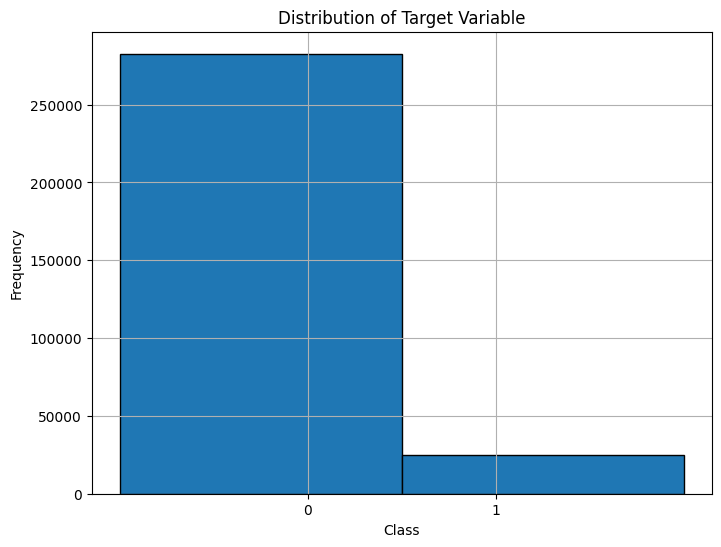

In [10]:
target_col = "TARGET"
target_data = app_train[target_col]
# value counts
print(f"Target variable distribution:\n"
      f"{target_data.value_counts()}\n"
      f"Ratio: {round(target_data.value_counts()[0]/target_data.value_counts()[1], 2)}")
# histograms
plt.figure(figsize=(8, 6))
plt.hist(target_data, bins=2, edgecolor='black', range=(-1, 2))
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.grid(True)
plt.show()

**5**: Describe briefly your observation (double click to edit a text cell).

**Answer**: from the histogram and `value_counts` its clear that the distribution of target variable is imbalanced; class `0` is more present than class `1` with ratio `11.39`.

### **6**

In [11]:
# Copy your current dataframe with its .copy() method. You should always use the copy() method if you want to keep the original dataframe untouched when you modify. This is a very common bug, so please read  https://www.statology.org/pandas-copy-dataframe/
app_train_new = app_train.copy()

### **6.a** - Fix imbalance with undersampling or oversampling. 

Implement undersampling or oversampling *without* external libraries, only the library provided to implement yourself the chosen solution.

**Solution**: For undersampling we can easily take the random subset of the dominant class with the cardinality $\ge$ the cardinality of the minority class, leading to the same number of instances in each class. This solution  is not good:
1. We lose a lot of valuable information. 
2. We might skew the actual distribution of the data when randomly discard rows from the given dataframe.

To make undersampling *smarter*, we **must not** remove samples randomly. We might do the following:
1. Represent each data point of the majority class in some space where we can perfom numerical operations, such as computing distance.
2. Find the biggest cluster of data (do steps `1` and `2` using *K-Means*, for example).
3. Find 2 points ($p_1, p_2$) in the cluster that are the closest to each other. Among $p_1, p_2$ find the one that is the closest to another point in the cluster (not including $p_1$ and $p_2$) and remove this ($p_1$ or $p_2$) point.
4. Logically, this will remove the "mean" point from the cluster, i.e. the point that is the most represented in the class. In other words, we will not lose much information by removing this point.
5. Note that this idea works for **continious** variables.

We can do the same if we want to oversample the minority class. That is essentially what *SMOTE* does: 
1. Selects a random point $x_i$ from the minority class.
2. Finds its k-nearest neighbors.
4. Randomly selects one of these neighbors, call it $x_{nn}$.
5. Computes the difference between the points
6. Creates a synthetic point along the line between the original and the neighbor by multiplying the difference by a random number between 0 and 1.
7. Again, this strategy works only for **continious** variables.

For simplicity we will **undersample** the majority class using the most simple technique, where we randomly discard rows from the given dataframe.

In [12]:
# first we handle NaN values
app_train_new = handle_nans(df=app_train_new)
print(f"\nTarget variable distribution BEFORE manual undersampling:\n{app_train_new['TARGET'].value_counts()}")
# then we undersample
class_0 = app_train_new[app_train_new["TARGET"] == 0]
class_1 = app_train_new[app_train_new["TARGET"] == 1]
# undersample the majority class
class_0_undersampled = class_0.sample(n=len(class_1), random_state=random_state)
# combine the undersampled class_0 and class_1
app_train_new = pd.concat([class_0_undersampled, class_1])
# shuffle the dataset
app_train_new = app_train_new.sample(frac=1, random_state=random_state).reset_index(drop=True)
print(f"\nTarget variable distribution AFTER manual undersampling:\n{app_train_new['TARGET'].value_counts()}")
print(f"\nNumber of NaN values: {app_train_new.isnull().sum().sum()}")

Number of NaNs BEFORE filling missing values in categorical columns: 306899
Number of NaNs AFTER filling missing values in categorical columns: 306899
Number of categorical columns: 52

Target variable distribution BEFORE manual undersampling:
TARGET
0    279864
1     24667
Name: count, dtype: int64

Target variable distribution AFTER manual undersampling:
TARGET
1    24667
0    24667
Name: count, dtype: int64

Number of NaN values: 0


### **6.b** - Fix balance with SMOTE on your previously copied dataframe

You can use any external libraries to use SMOTE. We recommend the imbalanced-learn package https://imbalanced-learn.org/stable/over_sampling.html. Make sure to select the appropriate SMOTE variant.

**Solution**: Oversampling data using *SMOTE* is a bit tricky in our case, since most of the columns we have are categorical. For the continious variables the idea is rather easy (see above explanation in `6.a`). For categorical variables the idea is almost identical, but instead of computing the typical distance measure during *K-Means*, it computes the *Hamming distance*, and once it has found the K-nearest neighbors of the randomly selected point in the minority class, it randomly selects one of them, and finally randomly picks the value for the generated synthetic point from either $x_i$ or the selected neighbor $x_{nn}$. We will use **SMOTE-NC** algorithm, since it can handle both numerical and categorical columns.

In [13]:
app_train_before_smote = app_train.copy()
# first we remove NaNs
app_train_before_smote = handle_nans(df=app_train)
# then we analyze categorical variables
categorical_features = app_train_before_smote.select_dtypes(include=['object', 'int64', 'bool']).columns.values
app_train_before_smote[categorical_features].nunique().sort_values(ascending=False)

Number of NaNs BEFORE filling missing values in categorical columns: 306899
Number of NaNs AFTER filling missing values in categorical columns: 306899
Number of categorical columns: 52


SK_ID_CURR                     304531
DAYS_BIRTH                      17458
DAYS_EMPLOYED                   12556
DAYS_ID_PUBLISH                  6167
ORGANIZATION_TYPE                  58
HOUR_APPR_PROCESS_START            24
CNT_CHILDREN                       15
NAME_INCOME_TYPE                    8
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  5
NAME_EDUCATION_TYPE                 5
REGION_RATING_CLIENT_W_CITY         3
CODE_GENDER                         3
REGION_RATING_CLIENT                3
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMEN

Luckily, the only 'weird' categorical features are `DAYS_BIRTH`, `DAYS_EMPLOYED` and `DAYS_ID_PUBLISH`. We can actually treat these columns as numerical columns, since all of them are represented in the time domain. We also decide to drop `SK_ID_CURR`, since we do not actually need it.

In [14]:
app_train_before_smote.drop(['SK_ID_CURR'], axis=1, inplace=True)
cats_to_remove = ['TARGET', 'SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']
categorical_features = categorical_features[~np.isin(categorical_features, cats_to_remove)]
categorical_features

array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', '

**WARNING**: cell below takes $\approx 5$ minutes to run.

In [15]:
# features X and target y
X = app_train_before_smote.drop("TARGET", axis=1)
y = app_train_before_smote['TARGET']
# convert categorical feature names to indices, as SMOTENC expects indices
categorical_indices = [X.columns.get_loc(col) for col in categorical_features]
# apply SMOTE-NC
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=random_state)
X_upsampled, y_upsampled = smote_nc.fit_resample(X, y)
# create a new DataFrame to store upsampled data
app_train_smote = pd.DataFrame(X_upsampled, columns=X.columns)
app_train_smote['TARGET'] = y_upsampled
print(f"Initial data shape: {app_train.shape}")
print(f"\n Target class distribution before SMOTENC upsampling: {app_train_before_smote['TARGET'].value_counts()}")
print(f"\n Target class distribution after SMOTENC upsampling: {app_train_smote['TARGET'].value_counts()}")
print(f"\nNumber of NaN values: {app_train_smote.isnull().sum().sum()}")

Initial data shape: (307511, 122)

 Target class distribution before SMOTENC upsampling: TARGET
0    279864
1     24667
Name: count, dtype: int64

 Target class distribution after SMOTENC upsampling: TARGET
1    279864
0    279864
Name: count, dtype: int64

Number of NaN values: 0


## **7, 8**: Categorical features (9pts)</h2>

In `app_test`

**7a**: How will you transform the column `NAME_HOUSING_TYPE` in `app_test` be correctly handled by the model? How will you transform `CODE_GENDER` column?

**Answer**: `NAME_HOUSING_TYPE` is a categorical variable that has 6 different classes. We can convert these classes into integers, i.e. $0,1,2,3,4,5$, or one-hot encode them, i.e. $[1,0,0,0,0,0], [0,1,0,0,0,0]$, etc. However, using integer encoding can sometimes cause the model to assume a ranking or ordinal relationship between the categories, which is not true in our case. So, we will use one-hot encoding. For `CODE_GENDER` we can use binary encoding, since it is a binary variable, and thus not increase feature space unnecessarily.

**7b**: How would you transform the column NAME_HOUSING_TYPE in app_test if you want only 3 categories? Use `LabelEncoder` to transform `FLAG_OWN_CAR` column.

**Answer**: to use only $3$ categories for `NAME_HOUSING_TYPE`, we would need to group some categories together. Logically, these categories would be:
1. `House / apartment`, `Co-op apartment` - stable housing, usually older people with stable income.
2. `With parents` - with parents, mostly young people.
3. `Municipal apartment`, `Rented apartment`, `Office apartment` - temporal housing.

**7c**: In `ORGANIZATION_TYPE`, only keep the categories that appear in more than 10% of the dataset. Group other categories in one. What is the size of the dummy vector for `ORGANIZATION_TYPE` after this transformation?

**Answer**: from the code we get that the size of the dummy vector for `ORGANIZATION_TYPE` after the transformation is $4$, i.e. we transform $58$ categories into $4$ categories.

8: In `app_test`, `app_past` and `bureau` transform all the categorical columns that you have not processed in **7** using `One-hot` encoding.

*You will be evaluated as follow*
* 7: Description of the approach 4pts. Code 3pts.
* 8: Correct approach + code 2pts.

### 7

In [16]:
print(f"{app_test['NAME_HOUSING_TYPE'].value_counts()}\n")
print(f"{app_test['CODE_GENDER'].value_counts()}\n")
print(f"{app_test['FLAG_OWN_CAR'].value_counts()}\n")
print(f"{app_test['ORGANIZATION_TYPE'].value_counts()}\n")
print(f"{app_test['ORGANIZATION_TYPE'].value_counts().shape[0]} classes for ORGANIZATION_TYPE")

NAME_HOUSING_TYPE
House / apartment      42753
With parents            2193
Municipal apartment     1602
Rented apartment         705
Office apartment         397
Co-op apartment          122
Name: count, dtype: int64

CODE_GENDER
F    32021
M    15751
Name: count, dtype: int64

FLAG_OWN_CAR
N    31675
Y    16097
Name: count, dtype: int64

ORGANIZATION_TYPE
Business Entity Type 3    10620
XNA                        9047
Self-employed              5810
Other                      2654
Medicine                   1689
Government                 1476
Business Entity Type 2     1452
Trade: type 7              1275
School                     1263
Kindergarten               1024
Construction               1021
Transport: type 4           873
Business Entity Type 1      873
Trade: type 3               570
Military                    519
Industry: type 9            491
Industry: type 3            477
Security                    464
Transport: type 2           438
Police                      429


In [17]:
def encodeBinary(df: pd.DataFrame, columns: List[str]) -> pd.DataFrame:
    """
    Encodes binary categorical columns (with two unique values) using LabelEncoder.

    Parameters:
        - df (pd.DataFrame): Input dataframe containing columns to be binary encoded.
        - columns (List[str]): List of column names to be binary encoded.

    Returns:
        - (pd.DataFrame): DataFrame with specified columns binary encoded (0, 1).
    """
    label_encoder = LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column]).astype(int)
    return df

def encodeOnehot(df: pd.DataFrame, columns: List[str], prefix: str ='OneHot') -> pd.DataFrame:
    """
    Encodes categorical columns with more than two unique values using one-hot encoding.

    Parameters:
        - df (pd.DataFrame): Input dataframe containing columns to be one-hot encoded.
        - columns (List[str]): List of column names to be one-hot encoded.
        - prefix (str): Prefix for new one-hot encoded columns (default is 'OneHot').

    Returns:
        - (pd.DataFrame): DataFrame with specified columns one-hot encoded.
    """
    df = pd.get_dummies(df, columns=columns, prefix=prefix, dtype=int)
    return df

In [18]:
app_test_new = app_test.copy()
# 7a & 7b & 7c
# encoding binary variables CODE_GENDER and FLAG_OWN_CAR
app_test_new = encodeBinary(df=app_test_new, columns=['CODE_GENDER', 'FLAG_OWN_CAR']) # 7a & 7b
# encoding NAME_HOUSING_TYPE
housing_mapping = {
    'House / apartment': 'Stable Housing',
    'Co-op apartment': 'Stable Housing',
    'Rented apartment': 'Rented/Temporary Housing',
    'Municipal apartment': 'Rented/Temporary Housing',
    'Office apartment': 'Rented/Temporary Housing',
    'With parents': 'With parents'
} # define mapping for NAME_HOUSING_TYPE to convert from 6 classes to 3
# apply the mapping to create a new column with 3 categories
app_test_new['NAME_HOUSING_TYPE'] = app_test_new['NAME_HOUSING_TYPE'].map(housing_mapping) # 7a
# encoding ORGANIZATION_TYPE
# define cut-off threshold
threshold = app_test_new.shape[0] * 0.1
# count each category 
org_type_counts = app_test_new['ORGANIZATION_TYPE'].value_counts()
# get categories whose count < threshold 
org_below_threshold = org_type_counts[org_type_counts < threshold].index
# replace categoies to 'Other' whose count < threshold
app_test_new['ORGANIZATION_TYPE'] = app_test_new['ORGANIZATION_TYPE'].replace(org_below_threshold, 'Other') # 7c

print(f"Original shape: {app_test.shape}; new shape: {app_test_new.shape}")

Original shape: (47772, 71); new shape: (47772, 71)


### 8

In [19]:
cols_to_onehot = app_test_new.select_dtypes(include=['object', 'int64']).columns
app_test_new[cols_to_onehot].nunique().sort_values(ascending=False)

SK_ID_CURR                     47772
DAYS_BIRTH                     15412
DAYS_EMPLOYED                   7813
DAYS_ID_PUBLISH                 5874
HOUR_APPR_PROCESS_START           24
CNT_CHILDREN                      11
WEEKDAY_APPR_PROCESS_START         7
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   6
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 5
REGION_RATING_CLIENT_W_CITY        4
ORGANIZATION_TYPE                  4
REGION_RATING_CLIENT               3
NAME_HOUSING_TYPE                  3
FLAG_DOCUMENT_3                    2
FLAG_DOCUMENT_4                    2
FLAG_DOCUMENT_9                    2
FLAG_DOCUMENT_5                    2
FLAG_DOCUMENT_6                    2
FLAG_DOCUMENT_7                    2
FLAG_DOCUMENT_8                    2
REG_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_11                   2
FLAG_DOCUMENT_18                   2
LIVE_CITY_NOT_WORK_CITY            2
LIVE_REGION_NOT_WORK_REGION        2
R

In [20]:
app_test_new['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     33986
1      9310
2      3883
3       523
4        49
5        12
8         3
6         3
7         1
20        1
11        1
Name: count, dtype: int64

In [21]:
cat_cols = app_past.select_dtypes(include=['object', 'int64', 'category']).columns
app_past[cat_cols].nunique().sort_values(ascending=False)

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
DAYS_DECISION                     2922
SELLERPLACE_AREA                  2097
NAME_GOODS_CATEGORY                 28
NAME_CASH_LOAN_PURPOSE              25
HOUR_APPR_PROCESS_START             24
PRODUCT_COMBINATION                 17
NAME_SELLER_INDUSTRY                11
CODE_REJECT_REASON                   9
CHANNEL_TYPE                         8
NAME_TYPE_SUITE                      7
WEEKDAY_APPR_PROCESS_START           7
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
NAME_CONTRACT_STATUS                 4
NAME_PAYMENT_TYPE                    4
NAME_CLIENT_TYPE                     4
NAME_CONTRACT_TYPE                   4
NAME_PRODUCT_TYPE                    3
NFLAG_LAST_APPL_IN_DAY               2
FLAG_LAST_APPL_PER_CONTRACT          2
dtype: int64

In [22]:
cat_cols = bureau.select_dtypes(include=['object', 'int64', 'category']).columns
bureau[cat_cols].nunique().sort_values(ascending=False)

SK_ID_BUREAU          1716428
SK_ID_CURR             305811
DAYS_CREDIT_UPDATE       2982
DAYS_CREDIT              2923
CREDIT_DAY_OVERDUE        942
CREDIT_TYPE                15
CNT_CREDIT_PROLONG         10
CREDIT_ACTIVE               4
CREDIT_CURRENCY             4
dtype: int64

We don't want to convert `SK_ID_CURR`, `DAYS_BIRTH`, `DAYS_EMPLOYED`, `DAYS_ID_PUBLISH`, `HOUR_APPR_PROCESS_START`, `CNT_CHILDREN` (from `app_test`), `SK_ID_PREV`, `DAYS_DECISION`, `SELLERPLACE_AREA` (from `app_past`) and `SK_ID_BUREAU`, `DAYS_CREDIT_UPDATE`, `DAYS_CREDIT`, `CREDIT_DAY_OVERDUE` into onehot vectors (name these columns as `cols_to_exclude`). We also don't want to encode columns that have $1$ unique value and we will binarize columns that have $2$ unique values. We will do the following:
1. Transform `CNT_CHILDREN` from $11$ categories into $4$ categories (to increase space efficiency):
   1. $0$ children.
   2. $1$ child.
   3. $2-3$ children.
   4. $4+$ children.
2. Select columns that have `object`, `int64`, `category` dtypes as categorical. Name these columns as `cat_cols`.
3. Exclude `cols_to_exclude` from `cat_cols`.
4. Define `to_binarize` (where the number of unique values $== 2$) and `to_onehot` (where the number of unique values $> 2$) using `cat_cols`.
5. Binarize and onehot columns of the given dataframe.

In [23]:
def transformChildren(df: pd.DataFrame):
    """
    Transforms the 'CNT_CHILDREN' column into categorical bins.

    Parameters:
        - df (pd.DataFrame): Input dataframe containing the 'CNT_CHILDREN' column.

    Returns:
        - (pd.DataFrame): DataFrame with 'CNT_CHILDREN' transformed into categorical bins.
    """
    df_ = df.copy()
    bins = [-1, 0, 1, 3, float('inf')]  # ranges: -1-0, 1-2, 3-4, 5+
    labels = ['0 children', '1 child', '2-3 children', '4+ children']
    df_['CNT_CHILDREN'] = pd.cut(df_['CNT_CHILDREN'], bins=bins, labels=labels)
    return df_

def handleCategorical(df: pd.DataFrame) -> pd.DataFrame:
    """
    Handles categorical variables in a DataFrame by:
    1. Transforming 'CNT_CHILDREN' into categorical bins.
    2. Identifying binary columns (for LabelEncoder) and columns for one-hot encoding.
    3. Encoding the binary columns and one-hot encoding the rest.

    Parameters:
        - df (pd.DataFrame): Input dataframe with categorical variables.

    Returns:
        - df (pd.DataFrame): DataFrame with binary and one-hot encoded columns.
    """
    # 1. transform CNT_CHILDREN into categorical variable
    if "CNT_CHILDREN" in df.columns:
        df = transformChildren(df=df)
    # 2. get categorical columns: onehot columns and binary columns
    cat_cols = df.select_dtypes(include=['object', 'int64', 'category']).columns
    cols_to_exclude = [
        'SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 
        'SK_ID_PREV', 'DAYS_DECISION', 'SELLERPLACE_AREA',
        'SK_ID_BUREAU', 'DAYS_CREDIT_UPDATE', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE']
    # filter out excluded columns
    cat_cols = cat_cols[~np.isin(cat_cols, cols_to_exclude)]
    # define columns to binarize and one-hot encode
    to_binarize = [col for col in cat_cols if df[col].nunique() == 2]
    to_onehot = [col for col in cat_cols if df[col].nunique() > 2]
    # 3. encode data
    df = encodeBinary(df=df, columns=to_binarize)
    df = encodeOnehot(df=df, columns=to_onehot)
    return df

In [24]:
print(f"app_test_new shape BEFORE binarization and onehot encoding: {app_test_new.shape}")
print(f"app_past shape BEFORE binarization and onehot encoding: {app_past.shape}")
print(f"bureau shape BEFORE binarization and onehot encoding: {bureau.shape}")
app_test_new = handleCategorical(df=app_test_new)
app_past = handleCategorical(df=app_past)
bureau = handleCategorical(df=bureau)
print(f"app_test_new shape AFTER binarization and onehot encoding: {app_test_new.shape}")
print(f"app_past shape AFTER binarization and onehot encoding: {app_past.shape}")
print(f"bureau shape AFTER binarization and onehot encoding: {bureau.shape}")

app_test_new shape BEFORE binarization and onehot encoding: (47772, 71)
app_past shape BEFORE binarization and onehot encoding: (1670214, 37)
bureau shape BEFORE binarization and onehot encoding: (1716428, 17)
app_test_new shape AFTER binarization and onehot encoding: (47772, 109)
app_past shape AFTER binarization and onehot encoding: (1670214, 163)
bureau shape AFTER binarization and onehot encoding: (1716428, 46)


## **9, 10**: Anomalies (7 pts)

**9**: In app_test:
- **9a**: Is there an anomaly with the column DEF_30_CNT_SOCIAL_CIRCLE? If so, how would you solve it?
- **9b**: Is there an anomaly with the column LANDAREA_AVG? If so, how would you solve it?
- **9c**: Is there an anomaly with the column AMT_INCOME_TOTAL? If so, how would you solve it?

**10**: Fix the anomaly in DAYS_EMPLOYED

*You will be evaluated as follow*
* 9: Description of the approach + code 5pts.
* 10: code 2pts

### **9**

In [25]:
app_test = pd.read_csv(src_test, compression="zip")

#### **9.a**

In [26]:
app_test['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

DEF_30_CNT_SOCIAL_CIRCLE
0.0     43195
1.0      4443
2.0       834
3.0       189
4.0        40
5.0         8
6.0         3
34.0        3
Name: count, dtype: int64

There appears to be a potential anomaly with the value $34.0$. Given the surrounding values ($0.0-6.0$), this large number seems out of place and may be a result of data entry error or an outlier. We can remove this value by either:
- Cap the values at $6$ (thus changing $7$ to $6$).
- Removing rows that contain this value, which is just $3$ rows.

I would cap the values at $6$ to preserve information.

#### **9.b**

In [27]:
app_test['LANDAREA_AVG'].value_counts()

LANDAREA_AVG
0.0000    2656
0.0141      37
0.0114      33
0.0158      33
0.0221      32
          ... 
0.3570       1
0.3172       1
0.2665       1
0.1778       1
0.2084       1
Name: count, Length: 2540, dtype: int64

A lot of values in `LANDAREA_AVG` are $0.0$, which mostly means that the information is missing. Since we will use *Random Forest* model, I believe the best solution in this case would be to keep $0.0$ values as placeholders for *missing* values. This way we will let the model decide how to interpret $0.0$ for `LANDAREA_AVG` and then define splitting based on this value.

#### **9.c**

In [28]:
app_test['AMT_INCOME_TOTAL'].value_counts()

AMT_INCOME_TOTAL
135000.0    5562
112500.0    4851
157500.0    4435
180000.0    4205
225000.0    3764
            ... 
114219.0       1
84717.0        1
91935.0        1
146475.0       1
161244.0       1
Name: count, Length: 606, dtype: int64

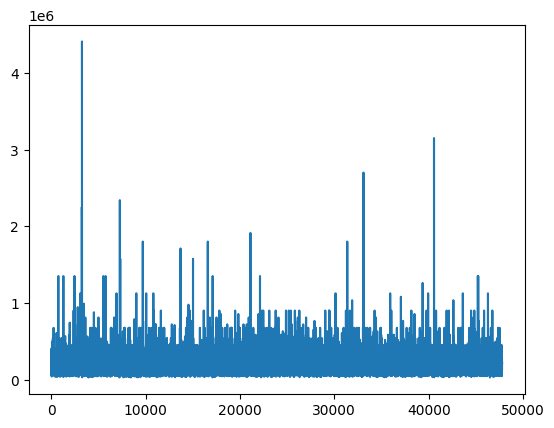

In [29]:
plt.plot(app_test_new['AMT_INCOME_TOTAL'].values)

Some values in `AMT_INCOME_TOTAL` seem unusually precise. It would be best to round highly precise values to the nearest $500$ or $1000$, as most other values are rounded.

### **10**

In [27]:
app_test['DAYS_EMPLOYED'].value_counts().sort_index()

DAYS_EMPLOYED
-17463        1
-17124        1
-17077        1
-16774        1
-16547        1
           ... 
-16           1
-14           1
-5            1
-1            1
 365243    9274
Name: count, Length: 7863, dtype: int64

Value **365243**, which appears **9047** times is an anomaly. It likely an indicator of missing or undefined employment information. Again, since we will use *Random Forest* model, I believe the best solution in this case would be to keep the value $365243$ as it is, or change it to $0$ as a placeholder value, and let the model itself decide how to interpret this value.

In [28]:
app_test['DAYS_EMPLOYED'] = app_test['DAYS_EMPLOYED'].replace(365243, 0)
app_test['DAYS_EMPLOYED'].value_counts().sort_index()

DAYS_EMPLOYED
-17463       1
-17124       1
-17077       1
-16774       1
-16547       1
          ... 
-16          1
-14          1
-5           1
-1           1
 0        9274
Name: count, Length: 7863, dtype: int64

## **11, 12**: Correlations (9 pts)


**11**: In `app_test`, remove the collinear features of the dataset. How did you choose the threshold?

**12**: What features from `bureau.csv` could you use to improve the training set? Use the random forest model from the notebook of the Lecture to check if it actually improves the final model performance.

*You will be evaluated as follow*
* 11: Code 3pts. Threshold explanation 1pt.
* 12: Description of the approach 1pt. Code implementation of the approach 2pts. Improved performance 2pts.

### **11**

In [29]:
types = []
for col in app_test.columns:
    dt = app_test[col].dtype
    if dt not in types:
        types.append(dt)
types

[dtype('int64'), dtype('O'), dtype('float64')]

In [30]:
def remove_collinear_features(df: pd.DataFrame, threshold: float = 0.85) -> Tuple[pd.DataFrame, List]:
    """
    Removes collinear features from the DataFrame based on a given correlation threshold.
    
    Parameters:
        - df (pd.DataFrame): The input DataFrame.
        - threshold (float): The correlation threshold for removing features.
    
    Returns:
        - Tuple[df (pd.DataFrame), to_drop (List)]: DataFrame with collinear features removed and list of columns that were removed.
    """
    # exclude categorical columns
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    # compute the correlation matrix
    corr_matrix = df[num_cols].corr().abs()
    # select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    # find features with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    # drop the features
    df = df.drop(to_drop, axis=1)
    return df, to_drop

In [31]:
thresholds = [0.95, 0.9, 0.85, 0.8, 0.75, 0.7]
for threshold in thresholds:
    app_test_11 = app_test.copy()
    len_before = len(app_test.select_dtypes(include=['float64', 'int64']).columns)
    app_test_11, dropped_columns = remove_collinear_features(df=app_test_11, threshold=threshold)
    len_after = len(app_test_11.select_dtypes(include=['float64', 'int64']).columns)
    print(f"Threshold: {threshold}; Columns removed: {len_before - len_after}")

Threshold: 0.95; Columns removed: 30
Threshold: 0.9; Columns removed: 34
Threshold: 0.85; Columns removed: 36
Threshold: 0.8; Columns removed: 39
Threshold: 0.75; Columns removed: 40
Threshold: 0.7; Columns removed: 41


The best way to choose *threshold* is to train models on different *train* sets which were constructed using different threshold values. Then evaluate models on the *test* set and see which model performs best or is faster to train / make inference relative to the dataset size.

Still, threshold values of `0.7`, `0.75` and `0.8` seems to low and we might lose valuable information with them. Threshold values of `0.95` or `0.9` seem rather too generous. So, we are left with `0.85`, which seems the best and removes $37$ collinear columns.

### **12**

1. Train & evaluate a `Random Forest` model on the training set.
1. Choose a set of features from `bureau` and incorporate them into the training set.
2. See if the model perfomance increases.

For now, we have the following data:
1. `bureau`: handeled **categorical** features.
2. `app_past`: handeled **categorical** features.
3. `app_train_new`: **No NaN** values, **downsampled**
4. `app_train_smote`: **No NaN** values, **upsampled**
5. `app_test`: **No NaN** values.
6. `app_test_new`: handeled **categorical** features, replaced $365243$ to $0$ in **DAYS_EMPLOYED**

We need to preprocess the training data:
1. Handle `AMT_INCOME_TOTAL`
2. Handle categorical features.
3. Change $365243$ to $0$ in `DAYS_EMPLOYED`.
4. Remove collinear features with threshold $0.85$ on **train** data, since testing for collinearity on the test data could lead to data leakage (here we can actually test if this increases the accuracy of the model).
5. Fix columns with duplicate names.

In [32]:
train = app_train_new.copy()
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,289635,1,Cash loans,F,N,N,0,112500.0,198000.0,15772.5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
1,336857,1,Cash loans,M,N,N,0,112500.0,545040.0,26509.5,...,0,0,0,0,0.006385,0.006981,0.034484,0.267782,0.266127,1.905904
2,236125,1,Cash loans,M,Y,Y,0,112500.0,291915.0,18783.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
3,163831,0,Cash loans,F,Y,Y,0,292500.0,509400.0,32683.5,...,0,0,0,0,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000
4,360914,0,Cash loans,F,N,Y,2,180000.0,787131.0,26145.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000


In [33]:
def handle_data(df):
    # 1. round AMT_INCOME_TOTAL to 500
    df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].apply(lambda x: round(x / 500) * 500).astype(float)
    # 2. handle categorical
    df = handleCategorical(df=df)
    # 3. change $365243$ to $0$ in DAYS_EMPLOYED
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, 0)
    # 4. remove collinear features with threshold 0.85
    df, dropped_columns = remove_collinear_features(df=df, threshold=threshold)
    # 5. fix duplicate columns
    df.columns = pd.io.common.dedup_names(df.columns, is_potential_multiindex=False)
    return df, dropped_columns

In [34]:
train, removed_cols = handle_data(df=train)
print(f"Number of removed collinear columns: {len(dropped_columns)}")
print(f"Removed collinear columns: {dropped_columns}")
print(f"Data shape: {train.shape}")

Number of removed collinear columns: 41
Removed collinear columns: ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 'ELEVATORS_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
Data shape: (49334, 165)


In [35]:
train.nunique().values

array([49334,     2,     2,     2,     2,   496,  3307,    80, 15548,
        7479, 12400,  5717,     1,     2,     2,     2,     2,     2,
          11,    24,     2,     2,     2,     2,     2,     2, 39980,
         781,    28,     7,  3342,     2,     2,     2,     2,     2,
           2,     2,     2,     1,     2,     1,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     4,     7,     8,
          21,    11,    19,     2,     2,     2,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     2,

In [36]:
def prepare_for_training(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
    """
    Prepares the given dataset for training by performing the following steps:
        1. Removes the 'SK_ID_CURR' column.
        2. Separates the dataset into features (train_x) and target variable (train_y).
        3. Splits the dataset into training and validation sets using an 80/20 split. The split is done randomly.
    
    Parameters:
        - df (pd.DataFrame): The input dataframe containing both the features and the target variable.
    
    Returns:
        - Tuple(pd.DataFrame, pd.DataFrame, pd.Series, pd.Series):
            - X_train (pd.DataFrame): Training set features.
            - X_val (pd.DataFrame): Validation set features.
            - y_train (pd.Series): Training set target values.
            - y_val (pd.Series): Validation set target values.
    """
    # 1. remove SK_ID_CURR
    if "SK_ID_CURR" in df.columns:
        df = df.drop("SK_ID_CURR", axis=1, inplace=False)
    # 2. store TARGET in a target variable
    train_x = df.drop("TARGET", axis=1, inplace=False)
    train_y = df["TARGET"]
    # 3. divide data into train/validation
    X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=random_state)
    return X_train, X_val, y_train, y_val

In [37]:
X_train, X_val, y_train, y_val = prepare_for_training(train)

In [38]:
X_train

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,OneHot_Trade: type 4,OneHot_Trade: type 5,OneHot_Trade: type 6,OneHot_Trade: type 7,OneHot_Transport: type 1,OneHot_Transport: type 2,OneHot_Transport: type 3,OneHot_Transport: type 4,OneHot_University,OneHot_XNA.1
42265,0,0,0,67500.0,460858.5,0.035792,-10437,-1469,-856.0,-683,...,0,0,0,0,0,0,0,0,0,0
45558,0,1,1,99000.0,269550.0,0.019101,-8508,-144,-3208.0,-1016,...,0,0,0,0,0,0,0,0,0,0
31927,0,1,1,270000.0,545040.0,0.016612,-13203,-793,-3839.0,-3839,...,0,0,0,0,0,0,0,0,0,0
21873,0,1,1,270000.0,359374.5,0.006629,-14745,-1256,-5765.0,-3937,...,0,0,0,0,0,0,0,0,0,0
21318,0,1,0,184500.0,450000.0,0.026392,-14259,-847,-3293.0,-4046,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,0,1,0,157500.0,1350000.0,0.025164,-16380,-6728,-3429.0,-4151,...,0,0,0,0,0,0,0,0,0,0
32511,0,0,0,225000.0,1206000.0,0.022800,-9853,-701,-5457.0,-1604,...,0,0,0,0,0,0,0,0,0,0
5192,1,0,1,225000.0,270000.0,0.010500,-18871,-754,-336.0,-2423,...,0,0,0,0,0,0,0,0,0,0
12172,0,0,1,81000.0,239850.0,0.025164,-24779,0,-7337.0,-4180,...,0,0,0,0,0,0,0,0,0,1


In [39]:
y_train

42265    1
45558    0
31927    1
21873    1
21318    1
        ..
43723    0
32511    1
5192     0
12172    1
33003    0
Name: TARGET, Length: 39467, dtype: int32

Now we are ready to train the model. Our aim is to evaluate the Random Forest model trained on the default data against the one trained on *SMOTE* data. Thus, we will use Random Forest with **default hyperparameters**.

In [40]:
def train_evaluate(X_train: pd.DataFrame, y_train: pd.Series, X_val: pd.DataFrame, y_val: pd.Series, random_state: int = random_state) -> Tuple[RandomForestClassifier, float, float, float, float, float]:
    """
    Trains a Random Forest classifier on the training data and evaluates it on the validation data.
    
    Parameters:
        - X_train (pd.DataFrame): Training set features.
        - y_train (pd.Series): Training set target values.
        - X_val (pd.DataFrame): Validation set features.
        - y_val (pd.Series): Validation set target values.
        - random_state (int): Random state for reproducibility (default is 42).
    
    Returns:
        - Tuple[RandomForestClassifier, float, float, float, float, float]:
            - rf_model (RandomForestClassifier): Random Forest model.
            - accuracy (float): The accuracy score of the model on the validation set.
            - precision (float): The precision score of the model on the validation set.
            - recall (float): The recall score of the model on the validation set.
            - f1 (float): The F1-Score of the model on the validation set.
            - roc_auc (float): The AUC-ROC score of the model on the validation set.
    """
    # initialize the Random Forest classifier
    rf_model = RandomForestClassifier(random_state=random_state)
    # train the model
    rf_model.fit(X_train, y_train)

    # make predictions on the validation set
    y_pred = rf_model.predict(X_val)

    # make predictions on the validation set
    y_pred = rf_model.predict(X_val)
    # probabilities of the positive class, for ROC AUC
    y_pred_proba = rf_model.predict_proba(X_val)[:, 1]

    # evaluate the model using different metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")

    return rf_model, accuracy, precision, recall, f1, roc_auc

In [41]:
rf, accuracy, precision, recall, f1, roc_auc = train_evaluate(
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val
)

Accuracy: 0.6757
Precision: 0.6749
Recall: 0.6694
F1-Score: 0.6721
AUC-ROC: 0.7352


#### Adding features from `bureau`

Select additional features from `bureau` data would require a more comprehensive analysis. For example, we could do the following:
1. Check for correlations between `bureau` variables and `TARGET` using *Point-Biserial* correlation or *Mutual Information*.
2. Train the model on all of the `bureau` features along with the `train` features. Then, check feature importance scores to identify which features from `bureau` are important.

For simplicity, we use all the columns from `bureau`, train the model and select the most important features from it. We will then see if there are any features in this list from `bureau`.

In [42]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,...,OneHot_Interbank credit,OneHot_Loan for business development,OneHot_Loan for purchase of shares (margin lending),OneHot_Loan for the purchase of equipment,OneHot_Loan for working capital replenishment,OneHot_Microloan,OneHot_Mobile operator loan,OneHot_Mortgage,OneHot_Real estate loan,OneHot_Unknown type of loan
0,215354,5714462,-497,0,-153.0,-153.0,NaN,91323.00,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,-208,0,1075.0,NaN,NaN,225000.00,171342.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,-203,0,528.0,NaN,NaN,464323.50,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,215354,5714465,-203,0,NaN,NaN,NaN,90000.00,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,215354,5714466,-629,0,1197.0,NaN,77674.5,2700000.00,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,-44,0,-30.0,NaN,0.0,11250.00,11250.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1716424,100044,5057754,-2648,0,-2433.0,-2493.0,5476.5,38130.84,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1716425,100044,5057762,-1809,0,-1628.0,-970.0,NaN,15570.00,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1716426,246829,5057770,-1878,0,-1513.0,-1513.0,NaN,36000.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


First, we need to handle data:
1. Handle `NaN` values.
2. Drop `SK_ID_BUREAU` - we don't need it.
3. Since there are multiple instances for most of the `SK_ID_CURR`, we need to aggregate the data on `SK_ID_CURR` before joining it with `train`.

In [43]:
# 1. handle NaNs
bureau_train = handle_nans(df=bureau)
print(f"Any remaining NaNs: {bureau_train.isna().any().any()}")

Number of NaNs BEFORE filling missing values in categorical columns: 363213
Number of NaNs AFTER filling missing values in categorical columns: 363213
Number of categorical columns: 38
Any remaining NaNs: False


In [44]:
# 2. drop `SK_ID_BUREAU`
bureau_train = bureau_train.drop("SK_ID_BUREAU", axis=1, inplace=False)
bureau_train

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,OneHot_Active,OneHot_Bad debt,...,OneHot_Interbank credit,OneHot_Loan for business development,OneHot_Loan for purchase of shares (margin lending),OneHot_Loan for the purchase of equipment,OneHot_Loan for working capital replenishment,OneHot_Microloan,OneHot_Mobile operator loan,OneHot_Mortgage,OneHot_Real estate loan,OneHot_Unknown type of loan
0,215354,-497,0,-153.000000,91323.00,0.000000,0.0,-131,0,0,...,0,0,0,0,0,0,0,0,0,0
1,215354,-208,0,1075.000000,225000.00,171342.000000,0.0,-20,1,0,...,0,0,0,0,0,0,0,0,0,0
2,215354,-203,0,528.000000,464323.50,137082.477661,0.0,-16,1,0,...,0,0,0,0,0,0,0,0,0,0
3,215354,-203,0,510.517334,90000.00,137082.477661,0.0,-16,1,0,...,0,0,0,0,0,0,0,0,0,0
4,215354,-629,0,1197.000000,2700000.00,137082.477661,0.0,-21,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,-44,0,-30.000000,11250.00,11250.000000,0.0,-19,1,0,...,0,0,0,0,0,1,0,0,0,0
1716424,100044,-2648,0,-2433.000000,38130.84,0.000000,0.0,-2493,0,0,...,0,0,0,0,0,0,0,0,0,0
1716425,100044,-1809,0,-1628.000000,15570.00,137082.477661,0.0,-967,0,0,...,0,0,0,0,0,0,0,0,0,0
1716426,246829,-1878,0,-1513.000000,36000.00,0.000000,0.0,-1508,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# 3. aggregate data
continuous_features = [
    'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 
    'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 
    'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE'
]
agg_funcs = ['mean', 'min', 'max']
# aggregating continuous features with mean, sum, min, max
bureau_agg = bureau_train.groupby('SK_ID_CURR')[continuous_features].agg(agg_funcs).reset_index()
# flatten the multi-level column index
bureau_agg.columns = [''.join(col).strip() if isinstance(col, tuple) else col for col in bureau_agg.columns]

# for onehot features we can aggregate by summing them, essentially turning them into categorical features
onehot_features = [
    'OneHot_Active', 'OneHot_Bad debt', 'OneHot_Closed', 'OneHot_Sold', 
    'OneHot_currency 1', 'OneHot_currency 2', 'OneHot_currency 3', 
    'OneHot_currency 4', 'OneHot_0', 'OneHot_1', 'OneHot_2', 
    'OneHot_3', 'OneHot_4', 'OneHot_5', 'OneHot_6', 'OneHot_7', 
    'OneHot_8', 'OneHot_9', 'OneHot_Another type of loan', 
    'OneHot_Car loan', 'OneHot_Cash loan (non-earmarked)', 
    'OneHot_Consumer credit', 'OneHot_Credit card', 'OneHot_Interbank credit', 
    'OneHot_Loan for business development', 
    'OneHot_Loan for purchase of shares (margin lending)', 
    'OneHot_Loan for the purchase of equipment', 
    'OneHot_Loan for working capital replenishment', 
    'OneHot_Microloan', 'OneHot_Mobile operator loan', 
    'OneHot_Mortgage', 'OneHot_Real estate loan', 
    'OneHot_Unknown type of loan'
]

# aggregating one-hot features with sum (counts the occurrences of each)
bureau_onehot_agg = bureau_train.groupby('SK_ID_CURR')[onehot_features].sum().reset_index()

# merging aggregated continuous and one-hot features back together
bureau_agg = pd.merge(bureau_agg, bureau_onehot_agg, on='SK_ID_CURR', how='left')
bureau_agg

,SK_ID_CURR,DAYS_CREDITmean,DAYS_CREDITmin,DAYS_CREDITmax,CREDIT_DAY_OVERDUEmean,CREDIT_DAY_OVERDUEmin,CREDIT_DAY_OVERDUEmax,DAYS_CREDIT_ENDDATEmean,DAYS_CREDIT_ENDDATEmin,DAYS_CREDIT_ENDDATEmax,...,OneHot_Interbank credit,OneHot_Loan for business development,OneHot_Loan for purchase of shares (margin lending),OneHot_Loan for the purchase of equipment,OneHot_Loan for working capital replenishment,OneHot_Microloan,OneHot_Mobile operator loan,OneHot_Mortgage,OneHot_Real estate loan,OneHot_Unknown type of loan
0,100001,-735.000000,-1572,-49,0.0,0,0,82.428571,-1329.0,1778.0,...,0,0,0,0,0,0,0,0,0,0
1,100002,-874.000000,-1437,-103,0.0,0,0,-134.120667,-1072.0,780.0,...,0,0,0,0,0,0,0,0,0,0
2,100003,-1400.750000,-2586,-606,0.0,0,0,-544.500000,-2434.0,1216.0,...,0,0,0,0,0,0,0,0,0,0
3,100004,-867.000000,-1326,-408,0.0,0,0,-488.500000,-595.0,-382.0,...,0,0,0,0,0,0,0,0,0,0
4,100005,-190.666667,-373,-62,0.0,0,0,439.333333,-128.0,1324.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305804,456249,-1667.076923,-2713,-483,0.0,0,0,-1098.267897,-2499.0,1363.0,...,0,0,0,0,0,0,0,0,0,0
305805,456250,-862.000000,-1002,-760,0.0,0,0,1288.333333,-272.0,2340.0,...,0,0,0,0,0,0,0,0,0,0
305806,456253,-867.500000,-919,-713,0.0,0,0,280.500000,-189.0,1113.0,...,0,0,0,0,0,0,0,0,0,0
305807,456254,-1104.000000,-1104,-1104,0.0,0,0,-859.000000,-859.0,-859.0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OneHot_Trade: type 4,OneHot_Trade: type 5,OneHot_Trade: type 6,OneHot_Trade: type 7,OneHot_Transport: type 1,OneHot_Transport: type 2,OneHot_Transport: type 3,OneHot_Transport: type 4,OneHot_University,OneHot_XNA.1
0,289635,1,0,0,0,112500.0,198000.0,0.020246,-18948,-973,...,0,0,0,0,0,0,0,0,0,0
1,336857,1,0,0,0,112500.0,545040.0,0.030755,-8233,-1191,...,0,0,0,0,0,0,0,0,0,0
2,236125,1,0,1,1,112500.0,291915.0,0.020246,-23411,0,...,0,0,0,0,0,0,0,0,0,1
3,163831,0,0,1,1,292500.0,509400.0,0.031329,-19149,-2963,...,0,0,0,0,0,0,0,0,0,0
4,360914,0,0,0,1,180000.0,787131.0,0.019101,-14408,-3401,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49329,374100,1,0,1,1,157500.0,432661.5,0.009175,-17560,-4016,...,0,0,0,0,0,0,0,0,0,0
49330,212992,1,0,0,1,76500.0,469152.0,0.008625,-13287,-1188,...,0,0,0,0,0,0,0,0,0,0
49331,407148,0,0,0,0,67500.0,180000.0,0.006296,-22301,0,...,0,0,0,0,0,0,0,0,0,1
49332,346408,0,0,1,0,157500.0,970380.0,0.018801,-17703,-2652,...,0,0,0,0,0,0,0,1,0,0


In [47]:
train_bureau = pd.merge(train, bureau_agg, on='SK_ID_CURR', how='left')
train_bureau

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OneHot_Interbank credit,OneHot_Loan for business development,OneHot_Loan for purchase of shares (margin lending),OneHot_Loan for the purchase of equipment,OneHot_Loan for working capital replenishment,OneHot_Microloan,OneHot_Mobile operator loan,OneHot_Mortgage,OneHot_Real estate loan,OneHot_Unknown type of loan
0,289635,1,0,0,0,112500.0,198000.0,0.020246,-18948,-973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,336857,1,0,0,0,112500.0,545040.0,0.030755,-8233,-1191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,236125,1,0,1,1,112500.0,291915.0,0.020246,-23411,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,163831,0,0,1,1,292500.0,509400.0,0.031329,-19149,-2963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,360914,0,0,0,1,180000.0,787131.0,0.019101,-14408,-3401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49329,374100,1,0,1,1,157500.0,432661.5,0.009175,-17560,-4016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49330,212992,1,0,0,1,76500.0,469152.0,0.008625,-13287,-1188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49331,407148,0,0,0,0,67500.0,180000.0,0.006296,-22301,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49332,346408,0,0,1,0,157500.0,970380.0,0.018801,-17703,-2652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# training & evaluating new model
X_tb_t, X_tb_v, y_tb_t, y_tb_v = prepare_for_training(train_bureau)
rf_tb, accuracy_tb, precision_tb, recall_tb, f1_tb, roc_auc_tb = train_evaluate(
    X_train=X_tb_t, y_train=y_tb_t,
    X_val=X_tb_v, y_val=y_tb_v
)

Accuracy: 0.6687
Precision: 0.6722
Recall: 0.6498
F1-Score: 0.6608
AUC-ROC: 0.7303


As we can see, the model perfomance does not significantly improve. Let's evaluate the model on a small subset of features, where features are picked based on their importance score evaluated by the model.

In [49]:
# get feature importances
importances_tb = pd.Series(rf_tb.feature_importances_, index=X_tb_t.columns)
important_features_tb = importances_tb.sort_values(ascending=False)
print(important_features_tb.head(20))  # display top 20 features

EXT_SOURCE_2                  0.061654
EXT_SOURCE_3                  0.053957
DAYS_BIRTH                    0.033699
AMT_CREDIT                    0.030602
DAYS_ID_PUBLISH               0.030253
DAYS_REGISTRATION             0.029706
DAYS_EMPLOYED                 0.029217
DAYS_LAST_PHONE_CHANGE        0.027580
DAYS_CREDITmean               0.024953
REGION_POPULATION_RELATIVE    0.024463
DAYS_CREDIT_ENDDATEmean       0.023435
DAYS_CREDIT_UPDATEmean        0.023273
DAYS_CREDITmin                0.023032
DAYS_CREDITmax                0.023015
AMT_INCOME_TOTAL              0.022747
DAYS_CREDIT_UPDATEmin         0.021241
AMT_CREDIT_SUMmean            0.021074
DAYS_CREDIT_ENDDATEmin        0.020828
DAYS_CREDIT_ENDDATEmax        0.020587
AMT_CREDIT_SUMmax             0.020508
dtype: float64


In [50]:
# use only features whose importance score > 0.01
importance_threshold = 0.01
important_columns = importances_tb.iloc[np.where(importances_tb.values > importance_threshold)].index.values
important_columns = np.insert(important_columns, 0, 'TARGET')  # insert 'TARGET' at position 0
important_columns = np.insert(important_columns, 0, 'SK_ID_CURR')  # insert 'SK_ID_CURR' at position 0
train_bureau_imp = train_bureau[important_columns]

In [51]:
X_tb_imp_t, X_tb_imp_v, y_tb_imp_t, y_tb_imp_v = prepare_for_training(train_bureau_imp)
rf_tb_imp, accuracy_tb_imp, precision_tb_imp, recall_tb_imp, f1_tb_imp, roc_auc_tb_imp = train_evaluate(
    X_train=X_tb_imp_t, y_train=y_tb_imp_t,
    X_val=X_tb_imp_v, y_val=y_tb_imp_v
)

Accuracy: 0.6634
Precision: 0.6671
Recall: 0.6433
F1-Score: 0.6550
AUC-ROC: 0.7230


In [52]:
metrics_table = {
    "Metric": ["#Columns", "Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"],
    "Original Agg. Data": [f"{X_tb_t.shape[1]}", f"{accuracy_tb:.4f}", f"{precision_tb:.4f}", f"{recall_tb:.4f}", f"{f1_tb:.4f}", f"{roc_auc_tb:.4f}"],
    "Reduced Agg. Data": [f"{X_tb_imp_t.shape[1]}", f"{accuracy_tb_imp:.4f}", f"{precision_tb_imp:.4f}", f"{recall_tb_imp:.4f}", f"{f1_tb_imp:.4f}", f"{roc_auc_tb_imp:.4f}"]
}
df_metrics = pd.DataFrame(metrics_table)
df_metrics

,Metric,Original Agg. Data,Reduced Agg. Data
0,#Columns,217,32
1,Accuracy,0.6687,0.6634
2,Precision,0.6722,0.6671
3,Recall,0.6498,0.6433
4,F1-Score,0.6608,0.6550
5,AUC-ROC,0.7303,0.7230


Based on the metric comparison above, we conclude that using only a subset of "important" features does not affect the perfomance of the model.

##  **13**: Class imbalance and model performances (6 points)


**13**: Evaluate the other technique (SMOTE) to handeling imbalance data left in **6.b**. Does it makes a difference on the final model performance? Can you use the performance on the test set to choose which techniques to use? If not, what would you need to do so?

*You will be evaluated as follow*
* 13: Code 3pts. Explanation 3pts.


In [53]:
app_train_smote

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,Cash loans,M,N,Y,0,202500.000000,4.065975e+05,24700.500000,3.510000e+05,Unaccompanied,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1
1,Cash loans,F,N,N,0,270000.000000,1.293502e+06,35698.500000,1.129500e+06,Family,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,Revolving loans,M,Y,Y,0,67500.000000,1.350000e+05,6750.000000,1.350000e+05,Unaccompanied,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,Cash loans,F,N,Y,0,135000.000000,3.126825e+05,29686.500000,2.970000e+05,Unaccompanied,...,0,0,0,0.006385,0.006981,0.034484,0.267782,0.266127,1.905904,0
4,Cash loans,M,N,Y,0,121500.000000,5.130000e+05,21865.500000,5.130000e+05,Unaccompanied,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559723,Cash loans,F,N,Y,0,81000.000000,2.250000e+05,17285.061240,2.250000e+05,Unaccompanied,...,0,0,0,0.005906,0.006457,0.031895,0.247675,0.246145,1.912970,1
559724,Cash loans,F,N,Y,0,247302.548836,1.731786e+05,9501.021508,1.441975e+05,Unaccompanied,...,0,0,0,0.000280,0.000306,0.001513,0.011750,0.011677,1.039749,1
559725,Cash loans,F,N,Y,0,112500.000000,1.137600e+05,9106.939523,9.000000e+04,Unaccompanied,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2.040648,1
559726,Cash loans,M,N,Y,0,112500.000000,4.170240e+05,20463.539696,3.600000e+05,Unaccompanied,...,0,0,0,0.002002,0.002189,0.010811,0.083947,0.083428,1.970502,1


In [54]:
train_smote = app_train_smote.copy()
train_smote, removed_cols = handle_data(df=train_smote)
print(f"Number of removed collinear columns: {len(dropped_columns)}")
print(f"Removed collinear columns: {dropped_columns}")
print(f"Data shape: {train_smote.shape}")
X_train_smote, X_val_smote, y_train_smote, y_val_smote = prepare_for_training(train_smote)

Number of removed collinear columns: 41
Removed collinear columns: ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 'ELEVATORS_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
Data shape: (559728, 165)


In [55]:
X_train_smote

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,OneHot_Trade: type 4,OneHot_Trade: type 5,OneHot_Trade: type 6,OneHot_Trade: type 7,OneHot_Transport: type 1,OneHot_Transport: type 2,OneHot_Transport: type 3,OneHot_Transport: type 4,OneHot_University,OneHot_XNA.1
15703,1,0,1,225000.0,292500.000000,0.022800,-21971,-1897,-1240.000000,-3788,...,0,0,0,0,0,0,0,0,0,0
549640,0,0,1,199000.0,228315.204744,0.028544,-14910,-6678,-2845.019529,-4406,...,0,0,0,0,0,0,0,0,0,0
524086,0,0,1,112500.0,269550.000000,0.032564,-15292,-1098,-2687.505423,-4455,...,0,0,0,0,0,0,0,0,0,0
252884,0,0,1,112500.0,314100.000000,0.046220,-15976,-201,-3970.000000,-951,...,0,0,0,0,0,0,0,0,0,0
24069,0,0,0,110000.0,900000.000000,0.006305,-12290,-745,-1329.000000,-1717,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371403,0,1,0,224000.0,540000.000000,0.005625,-13906,-1263,-4348.526144,-3587,...,0,0,0,0,0,0,0,0,0,0
491263,0,0,1,112500.0,508495.500000,0.026054,-11868,-675,-3102.245928,-3376,...,0,0,0,0,0,0,0,0,0,0
470924,0,0,1,110500.0,269550.000000,0.029774,-21565,0,-12658.641584,-3364,...,0,0,0,0,0,0,0,0,0,1
491755,0,0,1,67500.0,345504.018278,0.017789,-12513,-532,-6624.794990,-4212,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y_train_smote

15703     0
549640    1
524086    1
252884    0
24069     0
         ..
371403    1
491263    1
470924    1
491755    1
128037    0
Name: TARGET, Length: 447782, dtype: int32

In [57]:
rf_smote, accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote = train_evaluate(
    X_train=X_train_smote, y_train=y_train_smote,
    X_val=X_val_smote, y_val=y_val_smote
)

Accuracy: 0.9433
Precision: 0.9844
Recall: 0.9010
F1-Score: 0.9408
AUC-ROC: 0.9739


In [58]:
metrics_table = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"],
    "With SMOTE": [f"{accuracy_smote:.4f}", f"{precision_smote:.4f}", f"{recall_smote:.4f}", f"{f1_smote:.4f}", f"{roc_auc_smote:.4f}"],
    "Without SMOTE": [f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1:.4f}", f"{roc_auc:.4f}"]
}
df_metrics = pd.DataFrame(metrics_table)
df_metrics

,Metric,With SMOTE,Without SMOTE
0,Accuracy,0.9433,0.6757
1,Precision,0.9844,0.6749
2,Recall,0.9010,0.6694
3,F1-Score,0.9408,0.6721
4,AUC-ROC,0.9739,0.7352


**IMPORTANT**: Note that we check perfomance on the upsampled validation data, which is incorrect. We must check the perfomance of the `SMOTE` model on `X_val`, `y_val` for the correct comparison.

We will need to add `OneHot_Student` column to the validation data so that the input dimensions are valid. We will fill this column with $0$'s.

In [59]:
X_val_ = X_val.copy()
# 1. find the position of 'OneHot_Student' in train_smote
columns_train_smote = train_smote.columns.values
position = np.where(columns_train_smote == 'OneHot_Student')[0][0] - 1
# 2. add the 'OneHot_Student' column filled with zeros
# create a DataFrame of zeros for the new column
X_val_['OneHot_Student'] = 0
# 3. reorder columns to match the order in train_smote
columns_X_val = list(X_val_.columns)
columns_X_val.insert(position, columns_X_val.pop(columns_X_val.index('OneHot_Student')))
X_val_ = X_val_[columns_X_val]
X_val_.shape

(9867, 164)

In [60]:
X_val.columns

Index(['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'OneHot_Trade: type 4', 'OneHot_Trade: type 5', 'OneHot_Trade: type 6',
       'OneHot_Trade: type 7', 'OneHot_Transport: type 1',
       'OneHot_Transport: type 2', 'OneHot_Transport: type 3',
       'OneHot_Transport: type 4', 'OneHot_University', 'OneHot_XNA.1'],
      dtype='object', length=163)

In [61]:
X_val_.columns

Index(['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'OneHot_Trade: type 4', 'OneHot_Trade: type 5', 'OneHot_Trade: type 6',
       'OneHot_Trade: type 7', 'OneHot_Transport: type 1',
       'OneHot_Transport: type 2', 'OneHot_Transport: type 3',
       'OneHot_Transport: type 4', 'OneHot_University', 'OneHot_XNA.1'],
      dtype='object', length=164)

In [62]:
c1 = list(X_val_smote.columns)
c2 = list(X_val_.columns)
for i, col in enumerate(c1):
    if c1[i] != c2[i]:
        print(i, col)

In [63]:
# make predictions on the validation set
y_pred_smote = rf_smote.predict(X_val_)
# probabilities of the positive class, for ROC AUC
y_pred_proba_smote = rf_smote.predict_proba(X_val_)[:, 1]
# evaluate the model using different metrics
accuracy_smote = accuracy_score(y_val, y_pred_smote)
precision_smote = precision_score(y_val, y_pred_smote)
recall_smote = recall_score(y_val, y_pred_smote)
f1_smote = f1_score(y_val, y_pred_smote)
roc_auc_smote = roc_auc_score(y_val, y_pred_proba_smote)
# print the evaluation metrics
metrics_table = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"],
    "With SMOTE": [f"{accuracy_smote:.4f}", f"{precision_smote:.4f}", f"{recall_smote:.4f}", f"{f1_smote:.4f}", f"{roc_auc_smote:.4f}"],
    "Without SMOTE": [f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1:.4f}", f"{roc_auc:.4f}"]
}
df_metrics = pd.DataFrame(metrics_table)
df_metrics

,Metric,With SMOTE,Without SMOTE
0,Accuracy,0.9015,0.6757
1,Precision,0.9962,0.6749
2,Recall,0.8047,0.6694
3,F1-Score,0.8903,0.6721
4,AUC-ROC,0.9807,0.7352


The results are very surpising: `SMOTE` model significantly outperforms the defaullt model. SMOTE leads to a substantial improvement in all key metrics, especially in terms of recall and AUC-ROC, which are critical for evaluating class-imbalanced problems. Unless there is a mistake or we introduced some kind of a data leak, it is clear that `SMOTE` was very benefitial to use in this data.

Regarding the test data:
- We trained the model on the train data.
- We evaludated the model on the validation data.
- The test data we have doesn't include `TARGET` variable, so we can only predict for this test data, not evaluate the model on it.

So, answering the last questions: Can we use test set performance to choose between techniques and, if not, what should we do instead?
- No, we cannot use the test set performance because our test set doesn't have the target variable, we cannot evaluate model performance on it. Therefore, we should use our validation set performance, which we did, to decide between different techniques like `SMOTE` and `non-SMOTE`. Once we finalized our model on the validatino set, we can use the test set to make predictions, which might be used in a production environment or submitted for evaluation if ground truth is later provided.